<a href="https://colab.research.google.com/github/arpitamangal/machineLearningInPython/blob/master/LogisticRegression/LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## print all outputs 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Logistic Regression

In [ ]:
#Reading data from CSV
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/ML/customer.csv")
df.shape
df.head()
df.columns

(400, 5)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [ ]:
import numpy as np
df["Gender_dummy"] = np.where(df["Gender"]=="Female",1,0)
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased,Gender_dummy
0,15624510,Male,19,19000,0,0
1,15810944,Male,35,20000,0,0
2,15668575,Female,26,43000,0,1
3,15603246,Female,27,57000,0,1
4,15804002,Male,19,76000,0,0


#### Predict whether the customer will purchase the product.

In [ ]:
## model with all variables and all interaction terms

import statsmodels.api as sm
formula = 'Purchased ~ Age + EstimatedSalary + Gender_dummy + Age*EstimatedSalary*Gender_dummy'
model = sm.Logit.from_formula(formula = formula, data=df)
result = model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.258905
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:              Purchased   No. Observations:                  400
Model:                          Logit   Df Residuals:                      392
Method:                           MLE   Df Model:                            7
Date:                Sun, 16 Apr 2023   Pseudo R-squ.:                  0.6029
Time:                        20:42:24   Log-Likelihood:                -103.56
converged:                       True   LL-Null:                       -260.79
Covariance Type:            nonrobust   LLR p-value:                 4.954e-64
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                          -47.1728      7.991     -5.90

In [ ]:
##Removing gender_dummy as it is not significant
formula = 'Purchased ~ Age + EstimatedSalary + Int_Gender_Age + Int_Gender_EstimatedSalary + Int_Age_EstimatedSalary + Int_Gender_Age_EstimatedSalary'
model = sm.Logit.from_formula(formula = formula, data=df)
result = model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.262871
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:              Purchased   No. Observations:                  400
Model:                          Logit   Df Residuals:                      393
Method:                           MLE   Df Model:                            6
Date:                Sun, 16 Apr 2023   Pseudo R-squ.:                  0.5968
Time:                        20:42:25   Log-Likelihood:                -105.15
converged:                       True   LL-Null:                       -260.79
Covariance Type:            nonrobust   LLR p-value:                 3.134e-64
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                        -37.4162      4.622     -8.096     

In [ ]:
##Removing interaction of gender annd estimated salary as it is not significant
formula = 'Purchased ~ Age + EstimatedSalary + Int_Gender_Age + Int_Age_EstimatedSalary + Int_Gender_Age_EstimatedSalary'
model = sm.Logit.from_formula(formula = formula, data=df)
result = model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.262948
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:              Purchased   No. Observations:                  400
Model:                          Logit   Df Residuals:                      394
Method:                           MLE   Df Model:                            5
Date:                Sun, 16 Apr 2023   Pseudo R-squ.:                  0.5967
Time:                        20:42:27   Log-Likelihood:                -105.18
converged:                       True   LL-Null:                       -260.79
Covariance Type:            nonrobust   LLR p-value:                 3.883e-65
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                        -37.3584      4.614     -8.097     

In [ ]:
##Removing interaction of gender, age and estimated salary as it is not significant
formula = 'Purchased ~ Age + EstimatedSalary + Int_Gender_Age + Int_Age_EstimatedSalary'
model = sm.Logit.from_formula(formula = formula, data=df)
result = model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.262959
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:              Purchased   No. Observations:                  400
Model:                          Logit   Df Residuals:                      395
Method:                           MLE   Df Model:                            4
Date:                Sun, 16 Apr 2023   Pseudo R-squ.:                  0.5967
Time:                        20:42:28   Log-Likelihood:                -105.18
converged:                       True   LL-Null:                       -260.79
Covariance Type:            nonrobust   LLR p-value:                 4.143e-66
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 -37.3679      4.616     -8.096      0.000     -46.415   

In [ ]:
##Removing interaction of gender and age as it is least insignificant
formula = 'Purchased ~ Age + EstimatedSalary + Int_Age_EstimatedSalary'
model = sm.Logit.from_formula(formula = formula, data=df)
result = model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.266962
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:              Purchased   No. Observations:                  400
Model:                          Logit   Df Residuals:                      396
Method:                           MLE   Df Model:                            3
Date:                Sun, 16 Apr 2023   Pseudo R-squ.:                  0.5905
Time:                        20:42:30   Log-Likelihood:                -106.78
converged:                       True   LL-Null:                       -260.79
Covariance Type:            nonrobust   LLR p-value:                 1.843e-66
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 -36.1099      4.419     -8.172      0.000     -44.770   

The pseudo R-squ value of model with all variables and interaction terms is 0.6029. Trimming the interaction teram which is not significant reduced the pseudo R-squ to 0.5968. Removing more interaction terms which are not significant reduced the pseudo R-squ further. Keeping only the significant variables i.e. age, estimated salary and interaction between age and estimated salary the pseudo R-squ is 0.5905. Since there is not much difference between the psedo R-square value of full and trimmed model, by the principle of parsimony we choose the model with minumum variables. In the final model we have age, estimated salary and interaction between age and estimated salary with an pseudo r-square value of 0.5905.

#### Best model wrt to the in-sample R2

The coefficient for Age is 0.7750, which is positive we can say that the likelihood of purchasing the product increases with age. 

The coefficient for Estimated salary is 0.0.0003, which is positive we can say that the likelihood of purchasing the product increases with estimated salary. 

The coefficient for interaction of age and estimated salary is negative we can say that the age and estimated salary interact neagtively to predict likelihood of purchasing the product.

#### Is accuracy a good metric to judge the above model?

In [ ]:
df['Purchased'].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

It depends on data and context if accuracy is a good measure or not. Accuracy is the proportion of correct classifications among all classifications. When the data is imbalanced say 80% data has values corresponding to a class. Predicting that class for all the data point would give us 80% accuracy, this does not necessarily mean that the model is good. Hence, accuracy is not a good measure in such cases. In this case the model has 64% data for the customers who have not purchased the product. Predicting everything to be not purchased still gives an accuracy of 64%.

Moreover, even when the data is balanced across the categories to be classified but the cost of comitting error in prediction of categories could be different. For example, the consequense of failing to detect a fatal disease is much higher than falsely predicting the the disease. In cases again accuracy cannot be a good measure. Other method such as:
1) Precision- how accurate are positive predictions (TP/TP+FP)

2) Recall (or Sensitivity) — Ratio of predicted positive to total positive  (TP/TP+FN)

3) Specificity — How true were the negatives? (True Negative Rate) (TN/TN+FP)

4) F1 Score — Weighted Average of Recall and Precision (2\*Precision\*Recall/Precision+Recall)

Where TP,TN,FN,FP are number of true positive, true negative, false negative and false positive respectively from confusion matrix.

#### Interactions of the ‘Age’ and ‘Gender’ features with the ‘Purchased’ output.  

In [ ]:
from sklearn.linear_model import LogisticRegression
x = df[['Age', 'EstimatedSalary','Gender_dummy','Int_Gender_Age', 'Int_Gender_EstimatedSalary',
       'Int_Age_EstimatedSalary', 'Int_Gender_Age_EstimatedSalary']]
y = df['Purchased']
#Logistic Regression
reg=LogisticRegression()
reg.fit(x,y)
pred = reg.predict(x)
pred_prob = reg.predict_proba(x)
df_pred_prob = pd.DataFrame(pred_prob)
df_pred_prob.columns = ['0','1']
df["Pred_Prob"]= df_pred_prob['1']
df["Pred"]= pred

LogisticRegression()

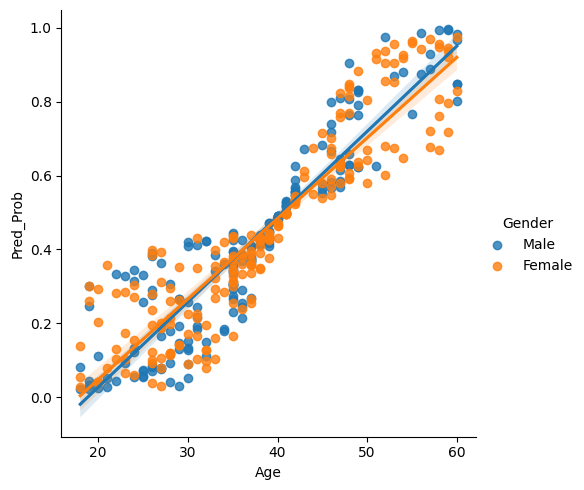

In [ ]:
import seaborn as sns
p = sns.lmplot(x="Age", y="Pred_Prob",
        data=df, hue="Gender", 
        line_kws={'label':"Linear Reg"}, legend=True)

From the plot, Age and Gender seems to interact to predict purchase output. For age below 40years, females seems to have high probability of purchasing. While at an age above 40years males seems to have higher chances of purchasing the product. However the difference is not significant. As it was also clear from the significance test of the interaction variables. The p-value for beta coefficient of age and gender interaction is 0.423 which is higher than any sigificant alpha and we fail reject the null hypothesis that coefficient is zero.

## Interaction Between Variables:
Two variables can interact in different ways to predict the dependent variable. Depending on that we decide if the interaction term be included. 

Example:  If the effect of Income and Change in savings on Likelihood of buying a house is shown in a, b or c. Should the regression equation include the interaction terms (interaction between Income and Average Savings) ?

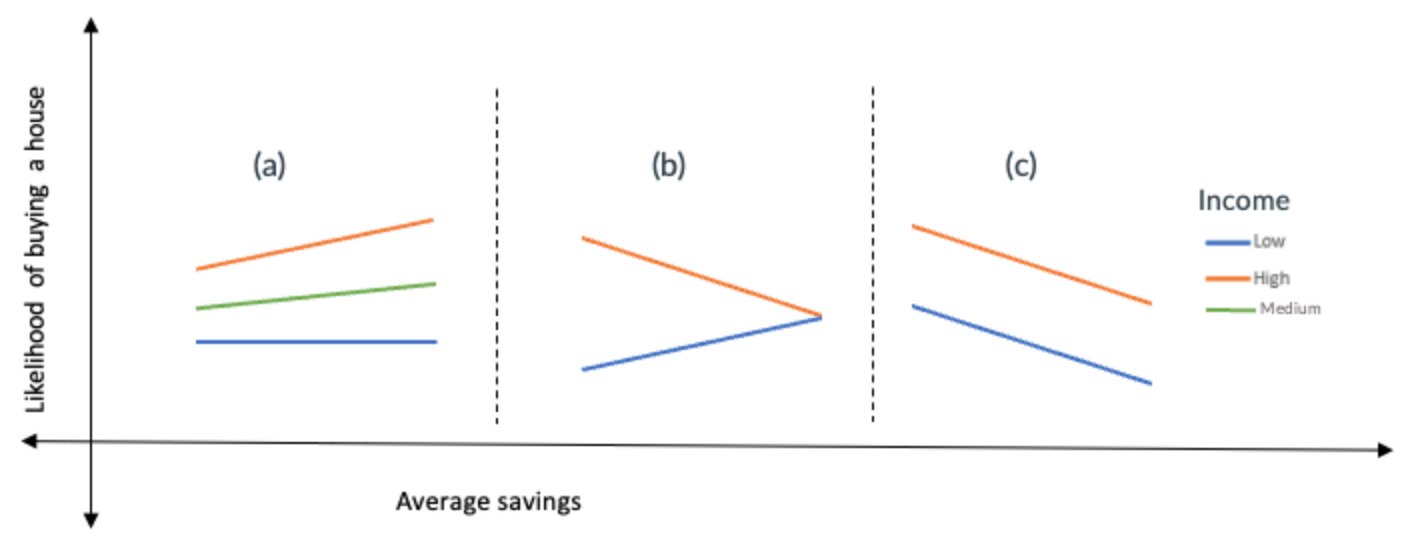

a) The regression equation should include interaction terms as the two regressions appear to be dissimilar. The effect of income level on likelihood of buying a house depends on average savings. For the low income group, likelihood of buying a house does not seem to change with average savings. For the medium and high income group, likelihood of buying a house increases with increase in average savings but the with different rates. Hence, the slopes are different and interaction term should be included.

b) The regression equation should include interaction terms as the two regressions appear to be dissimilar. The effect of income level on likelihood of buying a house depends on average savings. For the low income group, likelihood of buying a house increases with increase in average savings. On contrary, for the high income group, likelihood of buying a house decreases with increase in average savings. Hence, the slopes are different and interaction term should be included.

c) The two regression line appear to be parallel, regression equation should not include the interaction terms. The likehood of buying house decreases at the same rate with increase in average savings regardless of income group. Since the slopes are the same, hence interaction term is not required.